<a href="https://colab.research.google.com/github/alikaiser12/AI/blob/main/DeepONet_Flood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df1 = pd.read_excel('/content/drive/MyDrive/Flood/Data Discussion.xlsx')

Epoch 0: Training Loss = 0.6949
Epoch 10: Training Loss = 0.6291
Epoch 20: Training Loss = 0.5552
Epoch 30: Training Loss = 0.4658
Epoch 40: Training Loss = 0.3733
Epoch 50: Training Loss = 0.2991
Epoch 60: Training Loss = 0.2463
Epoch 70: Training Loss = 0.2079
Epoch 80: Training Loss = 0.1796
Epoch 90: Training Loss = 0.1585


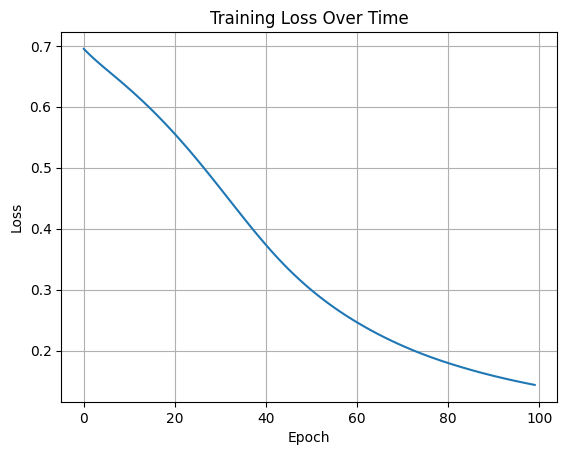

Test Accuracy: 0.90
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1


In [4]:
# 📦 1. Import required libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 📁 2. Load the dataset (Upload your Excel file first in Colab)
df = pd.read_excel("/content/drive/MyDrive/Flood/Data Discussion.xlsx", sheet_name="Sheet1")

# 🧹 3. Clean column names using the first row
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

# ✍️ 4. Rename the columns for easier understanding
df.columns = ['Year', 'Month', 'Rainfall_mm', 'WaterLevel_mMSL', 'Discharge_m3ps',
              'Cloud_pct', 'Precip_mm_per_day', 'Pressure_kPa', 'SpecificHumidity_gkg',
              'RelativeHumidity_pct', 'Temperature_C', 'WindDirection_deg',
              'WindSpeed_mps', 'NDVI', 'Flooded']

# 🔢 5. Convert month names to numbers
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df['Month'] = df['Month'].map(month_map)

# 🔁 6. Convert all values to numeric (some may be strings)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 🚫 7. Remove rows with any missing values
df.dropna(inplace=True)

# 🎯 8. Separate features (X) and target (y)
X = df.drop(columns=['Flooded'])  # Inputs
y = df['Flooded']                 # Output (1 = flood, 0 = no flood)

# 📊 9. Normalize the features (important for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🧪 10. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 🔁 11. Convert data into PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# 🧠 12. Build a DeepONet-like neural network
class DeepONet(nn.Module):
    def __init__(self, input_dim):
        super(DeepONet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),  # First hidden layer
            nn.ReLU(),
            nn.Linear(64, 32),         # Second hidden layer
            nn.ReLU(),
            nn.Linear(32, 1),          # Final output
            nn.Sigmoid()               # Output between 0 and 1
        )

    def forward(self, x):
        return self.net(x)

# 🧰 13. Initialize the model, loss function, and optimizer
model = DeepONet(input_dim=X_train.shape[1])
loss_fn = nn.BCELoss()  # For binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 🎓 14. Train the model
EPOCHS = 100
train_losses = []

for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    predictions = model(X_train)
    loss = loss_fn(predictions, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Training Loss = {loss.item():.4f}")

# 📈 15. Plot training loss
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.grid(True)
plt.show()

# 📊 16. Evaluate the model on test data
model.eval()
with torch.no_grad():
    test_preds = model(X_test)
    predicted_classes = (test_preds > 0.5).float()
    accuracy = (predicted_classes == y_test).sum().item() / y_test.shape[0]
    print(f"Test Accuracy: {accuracy:.2f}")

# 🧾 17. Show predicted vs actual for a few test samples
for i in range(10):
    print(f"Predicted: {int(predicted_classes[i].item())}, Actual: {int(y_test[i].item())}")
